In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git accelerate bitsandbytes

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 63.5 MB/s eta 0:00:00


In [2]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 11.1 MB/s eta 0:00:00


In [3]:
!pip install multion

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Jul 12 21:49:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   44C    P8              16W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import torch
print(torch.cuda.is_available())

True


In [5]:
from huggingface_hub import notebook_login

notebook_login()

In [6]:
from datetime import datetime


In [8]:
from transformers import InstructBlipProcessor, InstructBlipForConditionalGeneration
import torch

processor = InstructBlipProcessor.from_pretrained("Salesforce/instructblip-vicuna-7b")
model = InstructBlipForConditionalGeneration.from_pretrained("Salesforce/instructblip-vicuna-7b", load_in_4bit=True, torch_dtype=torch.float16)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


model-00001-of-00004.safetensors:  59%|#####9    | 5.85G/9.90G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/9.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.87G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
import firebase_admin
from firebase_admin import credentials, firestore
import requests
from PIL import Image
from io import BytesIO
import time

# Initialize Firebase Admin SDK
cred = credentials.Certificate('#') # Replace with firebase credentials json certificate
firebase_admin.initialize_app(cred)
db = firestore.client()

# Reference to your Firestore collection
collection_ref = db.collection('messages')

In [10]:
from openai import OpenAI
client = OpenAI(api_key='#') # Replace with your OpenAI API key

In [11]:
import re

def split_string(string):
  # Regular expression to match the text inside the brackets
  pattern = re.compile(r"(\[.*?\])")

  # Split the string using the regular expression
  parts = pattern.split(string)

  # Remove empty strings if any, and strip leading/trailing whitespace
  parts = [part.strip() for part in parts if part.strip()]

  # Print the resulting parts
  print(parts[1][1:-1])

  return parts[1][1:-1]

In [12]:
import multion
from multion.client import MultiOn


client_multiOn = MultiOn(
    api_key="#" # defaults to os.getenv("MULTION_API_KEY")
)

In [13]:
from multion import SessionsStepStreamRequestBrowserParams

def multion_call(string):

  response = client_multiOn.sessions.create(
    url="https://www.google.com/",
    local=True
  )

  sessionId = response.session_id
  status = response.status
  while status == 'CONTINUE':
    response = client_multiOn.sessions.step(session_id=sessionId, cmd=string)

    # if response.status == 'ASK_USER':

    if response.status == 'DONE':
      print('task completed')
      break
  print(response.message)

In [14]:
def openai_call(visual, human):
  visual_text = visual
  human_text = human
  prompt = """
    Visual: {visual}
    Human: {human}
    AI:
    """

  completion = client.chat.completions.create(
  model="gpt-4-turbo-2024-04-09",
  messages=[
    {"role": "system", "content": """
    You are an AI that can understand images and make deep analysis based on
    the visual description of the current scenario.
    You can place orders online. You can also help writing creative things, like jokes, and poems.

    Example:
    Visual: An image of Kung Pao Chicken.
    Human: Order this food from doordash
    AI: Sure, I can do it for you. [order kung pao chicken from doordash]
    Order can be done with something like 'Sure, I can do it for you. [order <item and its details> from <place if mentioned>]', where action square bracket is to be clear and precise according to the visual and human texts provided.

    Decode in the following format:
    Visual: ...
    Human: ...
    AI: ...

    print only the AI Response
    """},
    {"role": "user", "content": prompt.format(visual = visual_text, human = human_text)}
    ]
  )
  string = completion.choices[0].message.content
  print(string)

  splitString = split_string(string)
  current_time = datetime.now()

  collection_ref.add({
      'id': 'ai_id',
      'prompt': string,
      'time': current_time
  })

  multion_call(splitString)


  print("-----------------------")





In [15]:
# Track the latest document timestamp and ID
latest_timestamp = None
latest_document_id = None

# Define function to run additional code
def run_additional_code(imageUrl, text_human):
    try:
        # print(f"Fetching image from URL: {imageUrl}")
        # Fetch and process the image
        response = requests.get(imageUrl)
        if response.status_code == 200:
            # img = Image.open(BytesIO(response.content)).convert("RGB")
            raw_image = Image.open(requests.get(imageUrl, stream=True).raw).convert('RGB')
            print("Image successfully fetched and processed.")

            # Generate prompt answer using the model
            prompt = "Describe the image and the content in it."
            print(f"Preparing inputs for the prompt: {prompt}")
            inputs = processor(images=raw_image, text=prompt, return_tensors="pt").to(device="cuda", dtype=torch.float16)
            print("Inputs prepared for the model.")

            with torch.no_grad():
               # print("Generating text from the model...")
                # Generate text based on inputs
                outputs = model.generate(
                    **inputs,
                    num_beams=5,
                    max_length=512,
                    min_length=35,
                    top_p=0.95,
                    # top_k = 50,
                    repetition_penalty=1.5,
                    length_penalty=1.0,
                    temperature=1.0,
                    do_sample=True  # Set do_sample=True to use top_p
                )
                print("Text generation completed.")

            outputs[outputs == 0] = 2 # this line can be removed once https://github.com/huggingface/transformers/pull/24492 is fixed
            generated_text = processor.decode(outputs[0], skip_special_tokens=True).strip()
            # print(f"Generated text: {generated_text}")
            if generated_text:
                print(f"Generated text: {generated_text}")
                # Display image
                display(raw_image)


                openai_call(generated_text, text_human)
            else:
                print("No text generated. Using default message.")
                generated_text = "No response could be generated for the given prompt."


            # Update latest timestamp and document ID

        else:
            print(f"Failed to fetch image from {imageUrl}. Status code: {response.status_code}")

    except Exception as e:
        print(f"Error in processing or model generation: {e}")
        string = "AI Extension is working, please check its actions and make sure the right action is taken."
        current_time = datetime.now()

        collection_ref.add({
            'id': 'ai_id',
            'prompt': string,
            'time': current_time
        })

New user document added:
Image URL: https://firebasestorage.googleapis.com/v0/b/multion-project-b9754.appspot.com/o/images%2Fclassic-cheese-pizza-FT-RECIPE0422-31a2c938fc2546c9a07b7011658cfd05.jpg?alt=media&token=5c282fb6-e919-4151-89d1-d217d57d60f4
Text: order this pizza small size, from tandoori pizza on doordash, to 3363 middlebrooke Way san ramon
Image successfully fetched and processed.
Preparing inputs for the prompt: Describe the image and the content in it.
Inputs prepared for the model.
Text generation completed.
Generated text: The image depicts a freshly baked cheese pizza sitting on top of an oven rack. The pizza appears to have just come out of the oven, as it is still warm and has not yet cooled down. There are several slices of pizza visible in the image, with one slice placed closer to the center of the oven rack than the others.


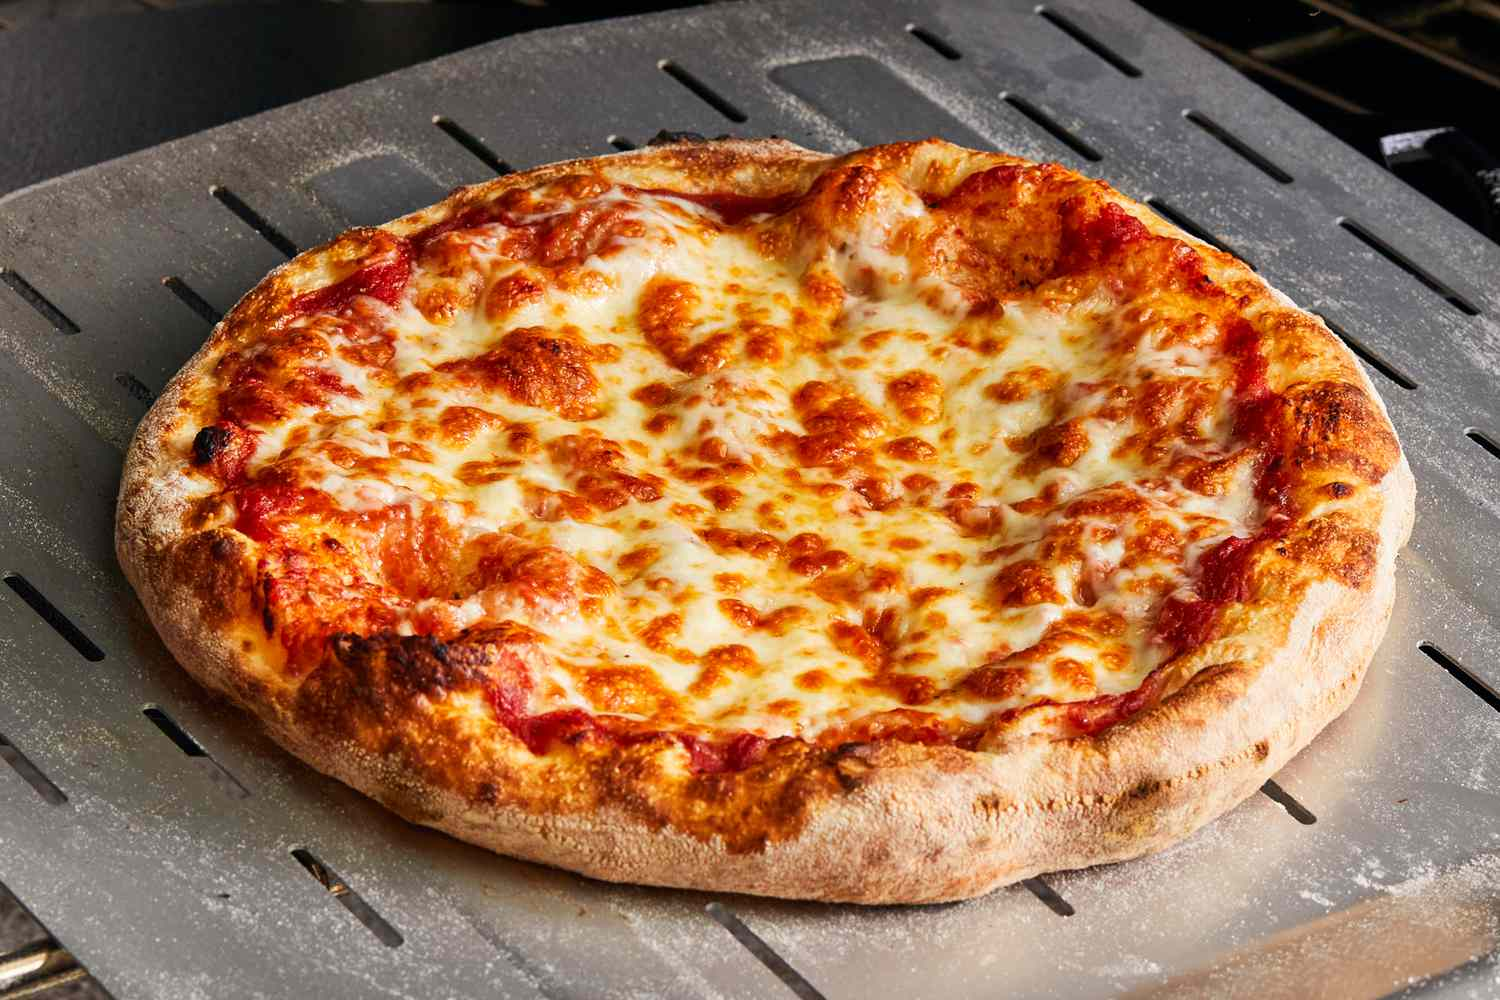

Sure, I can do it for you. [order small size cheese pizza from Tandoori Pizza on DoorDash to 3363 Middlebrooke Way, San Ramon]
order small size cheese pizza from Tandoori Pizza on DoorDash to 3363 Middlebrooke Way, San Ramon
Error in processing or model generation: status_code: 408, body: {'detail': 'Request to the extension has timed out. Please ensure that the API is enabled on the extension.'}
Stopped listening


In [17]:
# Function to check for new documents
def check_for_new_documents():
    global latest_timestamp, latest_document_id
    try:
        # print("Checking for new documents...")
        query = collection_ref.order_by('time', direction=firestore.Query.DESCENDING).limit(1)
        docs = query.stream()

        # print("docs")

        for doc in docs:
            doc_data = doc.to_dict()
            id = doc_data.get('id')
            timestamp = doc_data.get('time')

            if id == 'user_id':
                # Check if it has imageUrl and text_human
                imageUrl = doc_data.get('imageUrl')
                text_human = doc_data.get('text')

                if imageUrl and text_human:
                    if latest_timestamp is None or timestamp > latest_timestamp:
                        latest_document_id = id
                        latest_timestamp = timestamp

                        print(f"New user document added:")
                        print(f"Image URL: {imageUrl}")
                        print(f"Text: {text_human}")

                        # Run additional code for user document
                        run_additional_code(imageUrl, text_human)

            else:
              continue

    except Exception as e:
        print(f"Error in checking documents: {e}")



# Keep checking for new documents
try:
    while True:
        check_for_new_documents()
        time.sleep(1)  # Adjust the sleep interval as needed
except KeyboardInterrupt:
    print("Stopped listening")